In [27]:
import pandas as pd 
df = pd.read_csv("googleplaystore.csv")

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [30]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [31]:
df.duplicated().sum()

483

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
# convert price to float64
index = df[df['Price'] == ('Everyone')].index
df.drop(index , inplace = True)
df['Price'] = df['Price'].str.strip('$')
df['Price'] = df['Price'].astype('float')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format="%B %d, %Y")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [35]:
# convert reviews to float64
df['Reviews'] = df['Reviews'].astype('float')

In [36]:
df['Type'].unique()
missing_indices = df[df['Type'].isnull()].index
print(missing_indices)
value = df.loc[missing_indices,'App']
print(value)
df['Type'] = df['Type'].fillna("Free")

Index([9148], dtype='int64')
9148    Command & Conquer: Rivals
Name: App, dtype: object


In [37]:
missing_indices = df[df['Android Ver'].isnull()].index
print(missing_indices)
value = df.loc[missing_indices,'App']
print(value)
for index in missing_indices:
    app_value = df.loc[index, 'App']
    if app_value == '[substratum] Vacuum: P':
        df.loc[index, 'Android Ver'] = '8.1 and 9.0'
    elif app_value == 'Pi Dark [substratum]':
        df.loc[index, 'Android Ver'] = '8.1'

Index([4453, 4490], dtype='int64')
4453    [substratum] Vacuum: P
4490      Pi Dark [substratum]
Name: App, dtype: object


In [38]:
print(df.loc[4453,'Android Ver'])
print(df.loc[4490,'Android Ver'])

8.1 and 9.0
8.1


In [39]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
df = df.convert_dtypes()

In [40]:
missing_values = df[df['Current Ver'].isnull()]
df['Current Ver'] = df['Current Ver'].fillna('Not Available')

In [41]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

In [42]:
# Fix size in M
def fix_size(size):
    size = size.replace(",","").replace("+","").strip()
    if "M" in size:
        return size.replace("M","")
    if "K"in size or size.isdigit():
        return (size.replace("K","")) / 1024
    else:
        return None
df["Size"] = df["Size"].apply(fix_size)

In [43]:
df["Size"] = df["Size"].fillna(df["Size"].median())
df['Size'] = df['Size'].astype('float')
df.rename(columns={'Size': 'Size(M)'}, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [44]:
median_value = df['Price'].median()
Q1 = df['Size(M)'].quantile(0.25)
Q3 = df['Size(M)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Size(M)'] = df['Size(M)'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  string        
 1   Category        10357 non-null  string        
 2   Rating          10357 non-null  Float64       
 3   Reviews         10357 non-null  Int64         
 4   Size(M)         10357 non-null  float64       
 5   Installs        10357 non-null  Int64         
 6   Type            10357 non-null  string        
 7   Price           10357 non-null  Float64       
 8   Content Rating  10357 non-null  string        
 9   Genres          10357 non-null  string        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  string        
 12  Android Ver     10357 non-null  string        
dtypes: Float64(2), Int64(2), datetime64[ns](1), float64(1), string(7)
memory usage: 1.4 MB


In [48]:
df.describe()

,Rating,Reviews,Size(M),Installs,Price,Last Updated
count,10357.0,10357.0,10357.000000,10357.0,10357.0,10357
mean,4.187877,405904.610602,14.357449,14157759.440668,1.0308,2017-11-14 09:25:19.320266496
min,1.0,0.0,0.000000,0.0,0.0,2010-05-21 00:00:00
25%,4.1,32.0,4.300000,1000.0,0.0,2017-09-03 00:00:00
50%,4.2,1680.0,14.000000,100000.0,0.0,2018-05-20 00:00:00
75%,4.5,46416.0,19.000000,1000000.0,0.0,2018-07-19 00:00:00
max,5.0,78158306.0,55.000000,1000000000.0,400.0,2018-08-08 00:00:00
std,0.48402,2696777.836748,12.615431,80239553.869019,16.278625,NaN


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

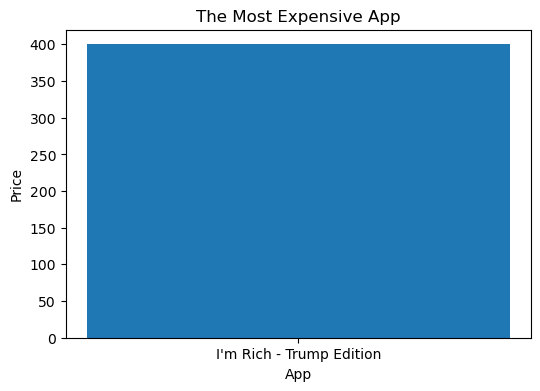

In [24]:
# What is the most expensive app on the Play Store?
expensive = df[df['Price'] == df['Price'].max()]
plt.figure(figsize = (6,4))
plt.bar(expensive['App'],expensive['Price'])
plt.title("The Most Expensive App")
plt.xlabel("App")
plt.ylabel("Price")
plt.show()

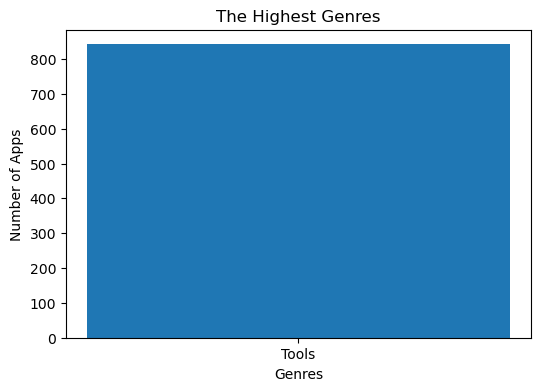

In [25]:
# Which genre has the highest number of apps?
value = df['Genres'].str.split(',').str[0].value_counts().max()
name = df['Genres'].str.split(',').str[0].value_counts().index[0]
plt.figure(figsize=(6,4))
plt.bar(name, value) 
plt.title('The Highest Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.show()

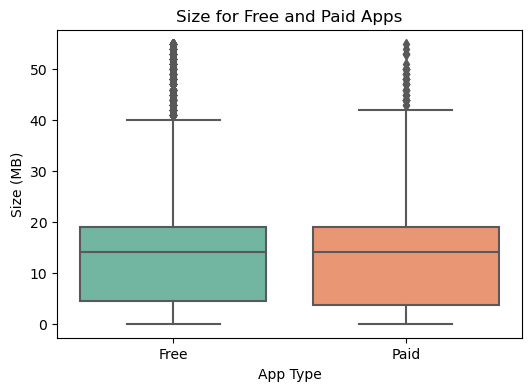

In [45]:
# What is the average size of free vs. paid apps?
# avg = df.groupby('Type')['Size(M)'].mean()
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Size(M)', data=df, palette='Set2')
plt.title('Size for Free and Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Size (MB)')
plt.show()

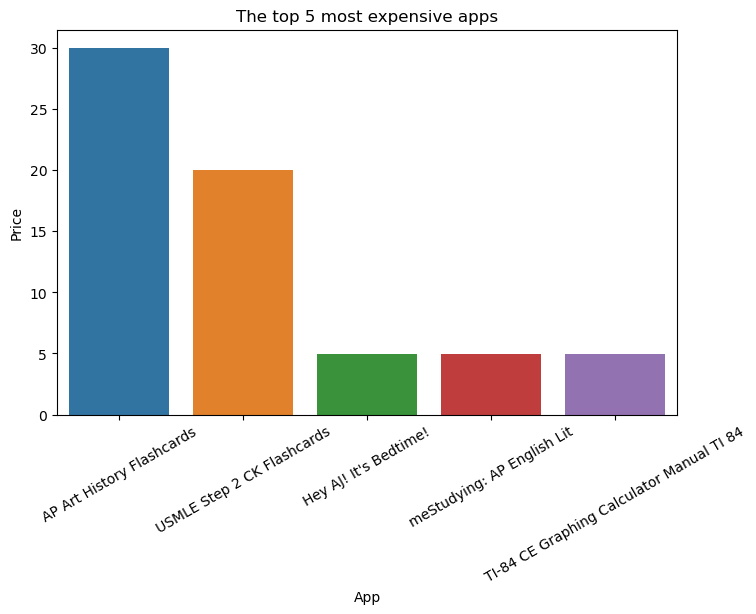

In [23]:
# What are the top 5 most expensive apps with a perfect rating (5)?
highest_rate = df[df['Rating'] == 5]
top_5_expensive = highest_rate.nlargest(5,"Price")
plt.figure(figsize=(8,5))
sns.barplot(x = 'App', y = 'Price', data = top_5_expensive)
plt.title('The top 5 most expensive apps')
plt.xlabel('App')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.show()

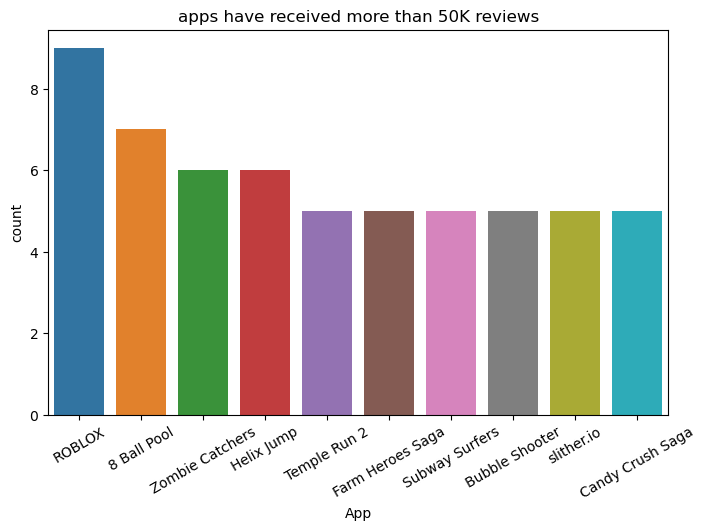

In [24]:
# How many apps have received more than 50K reviews?
receive = df[df['Reviews'] > 50000]
count = receive['App'].value_counts().reset_index()
count.columns = ['App','count']
plt.figure(figsize=(8,5))
sns.barplot(x = 'App', y = 'count', data = count.head(10))
plt.title('apps have received more than 50K reviews')
plt.xlabel('App')
plt.ylabel('count')
plt.xticks(rotation=30)
plt.show()

In [25]:
# What is the average price of apps, grouped by genre and number of installs?

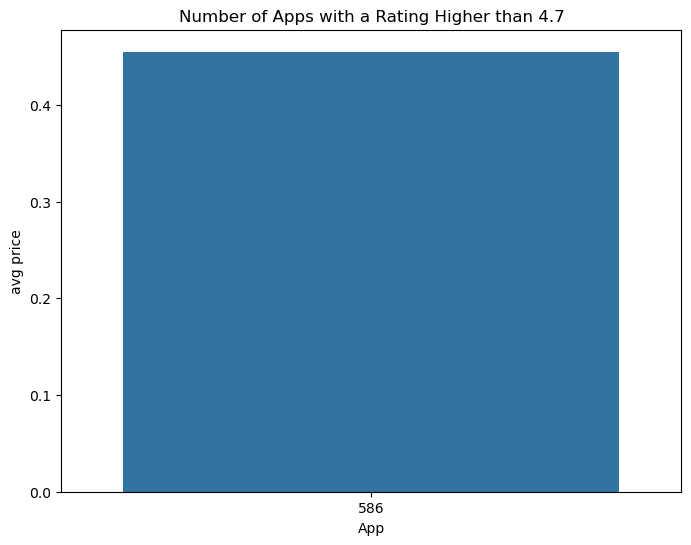

In [26]:
# How many apps have a rating higher than 4.7, and what is their average price?
higher = df[df['Rating'] > 4.7]
number_apps = higher.shape[0]
avg_price = higher['Price'].mean()
data = pd.DataFrame(
    {
        'app' : [number_apps],
        'price' : [avg_price]
    }
)
plt.figure(figsize=(8,6))
sns.barplot(data=data, x= 'app' , y= 'price')
plt.title('Number of Apps with a Rating Higher than 4.7')
plt.xlabel('App')
plt.ylabel('avg price')
plt.show()

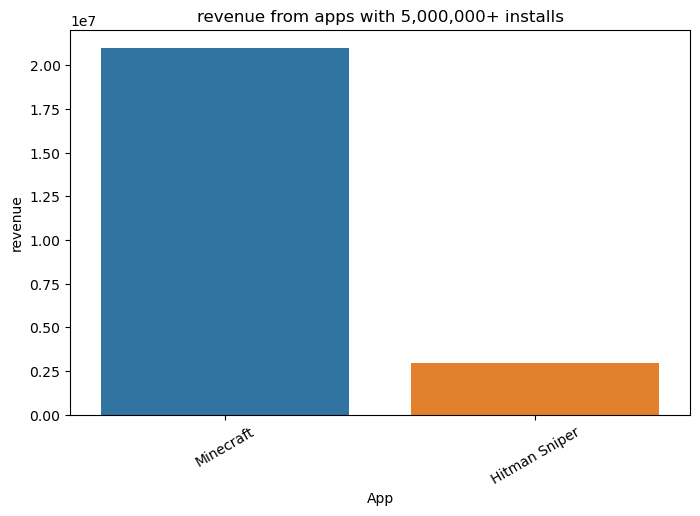

In [29]:
# What is Google's estimated revenue from apps with 5,000,000+ installs? (Assuming Google takes a 30% cut from app sales)
install = df[df['Installs']  >= 5000000].copy()
install['revenue'] =install['Price']*install['Installs']*0.3
install_filtered = install[install['revenue'] > 1e6]
plt.figure(figsize=(8,5))
sns.barplot(x = 'App', y = 'revenue', data = install_filtered)
plt.title('revenue from apps with 5,000,000+ installs')
plt.xlabel('App')
plt.ylabel('revenue')
plt.xticks(rotation=30)
plt.show()

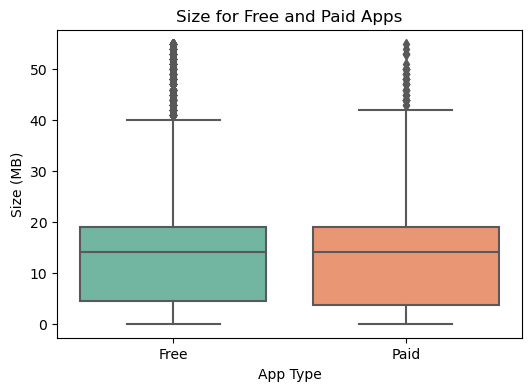

In [46]:
# What are the maximum and minimum sizes of free vs. paid apps?
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Size(M)', data=df, palette='Set2')
plt.title('Size for Free and Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Size (MB)')
plt.show()

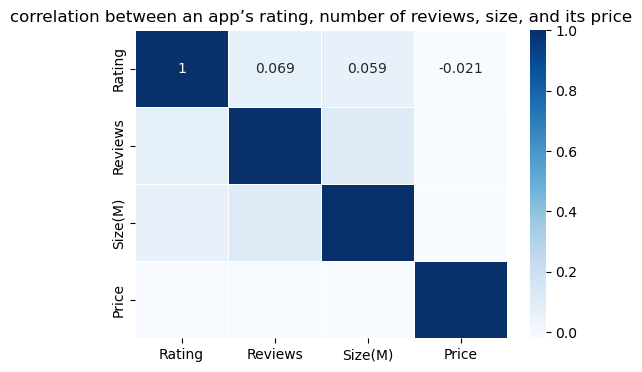

In [35]:
# Is there a correlation between an app’s rating, number of reviews, size, and its price?
matrix = df[['Rating','Reviews','Size(M)','Price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot = True,cmap = "Blues",linewidth = 0.5)
plt.title('correlation between an app’s rating, number of reviews, size, and its price')
plt.show()

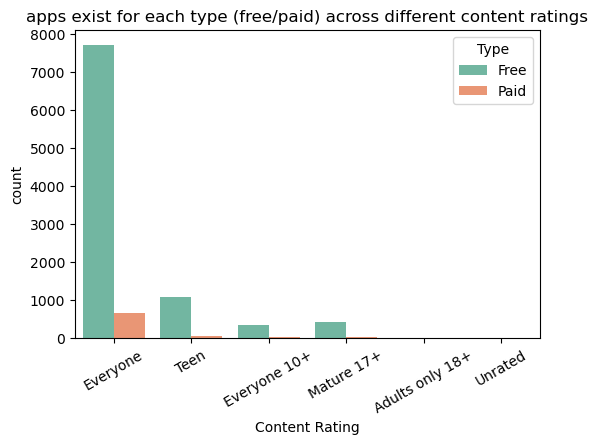

In [49]:
# How many apps exist for each type (free/paid) across different content ratings?# Count apps by type and content rating
plt.figure(figsize=(6, 4))
sns.countplot(x='Content Rating', hue='Type', data=df, palette='Set2')
plt.title('apps exist for each type (free/paid) across different content ratings')
plt.xlabel('Content Rating')
plt.ylabel('count')
plt.xticks(rotation=30)
plt.show()

6697


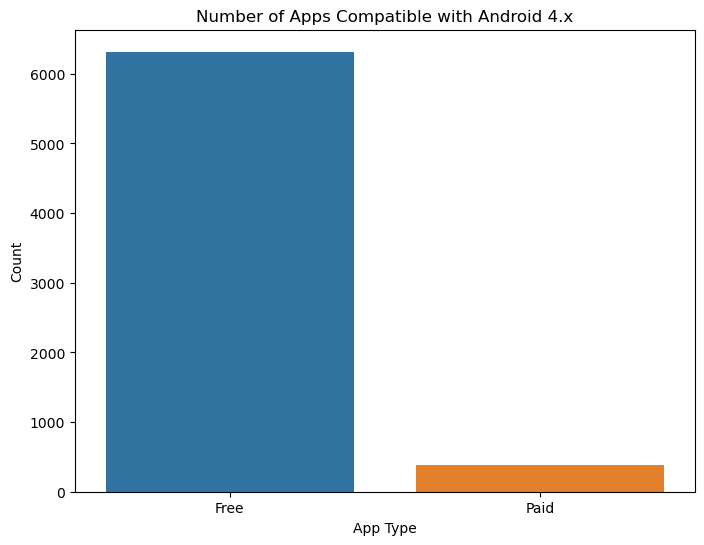

In [46]:
# How many apps are compatible with Android version 4.x?
version = df[df['Android Ver'].str.contains('4.')]
print(version.shape[0])
plt.figure(figsize=(8,6))
sns.countplot(data=version, x='Type')
plt.title('Number of Apps Compatible with Android 4.x')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()
